In [1]:
!pip install -U -q tensorflow-addons

In [2]:
from db1_preprocess_utils import *
from feature_extraction import *
from experiment_one_utils import *

In [3]:
from tensorflow.keras import layers
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import tensorflow as tf
import numpy as np
from sklearn.model_selection import KFold
from scipy.signal import stft

In [4]:
path = ''

signal_type='raw'
input_type='stft'
n_channels=64
low_cut=20
high_cut=50
order=6 
window_size=50
overlap=50
fs=2048

whiten=False
center=False
extend=False
extend_size=0
normalize=False
mu=0

start_subject = 1
total_subject = 20
session=[1,2]
ratio = 0.2

noise_db = [5,10,15]
std = 1
stochastic_depth_rate = 0.1

In [5]:
data, label, X_test, y_test = get_experiment_data(path, subjects=start_subject, sessions=session,
                                                       signal_type='raw', input_type=input_type, 
                                                       channels=n_channels, low_cut=20, high_cut=500,
                                                      order=6, window_size=window_size, overlap=overlap, fs=fs, 
                                                      extend=extend, center=center, 
                                                      extend_size=extend_size, whiten=whiten,
                                                      normalize=False, mu=0, ratio=0.2)

####################################################################################
Loading subject 1
####################################################################################
Size of the input data is (17152, 64, 52, 3)
The input label shape is (17152,)
The total number of classes is 34
************************************************************************************
Loaded STFT input data
************************************************************************************


In [6]:
data.shape, label.shape, X_test.shape, y_test.shape

((17152, 64, 52, 3), (17152,), (4288, 64, 102), (4288,))

(array([130., 115., 132., 146., 130., 145., 130., 118., 127., 121., 128.,
        124., 142., 138., 120., 134., 116., 126., 135., 134., 118., 135.,
        125., 124.,  71., 150., 111., 125., 120., 111., 119., 121., 149.,
        118.]),
 array([ 0.        ,  0.97058824,  1.94117647,  2.91176471,  3.88235294,
         4.85294118,  5.82352941,  6.79411765,  7.76470588,  8.73529412,
         9.70588235, 10.67647059, 11.64705882, 12.61764706, 13.58823529,
        14.55882353, 15.52941176, 16.5       , 17.47058824, 18.44117647,
        19.41176471, 20.38235294, 21.35294118, 22.32352941, 23.29411765,
        24.26470588, 25.23529412, 26.20588235, 27.17647059, 28.14705882,
        29.11764706, 30.08823529, 31.05882353, 32.02941176, 33.        ]),
 <BarContainer object of 34 artists>)

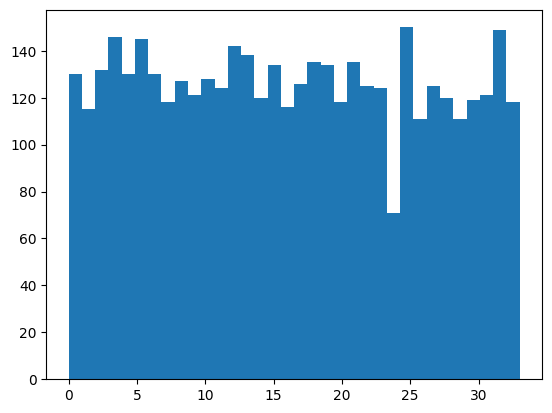

In [7]:
 plt.hist(y_test, bins=34)

In [8]:
#Hyper-parameter

input_shape = data.shape[1:]
patch_size = 8
n_patches = 12 #(win_data.shape[1] * win_data.shape[2]) / patch_size**2) #int(((win_data.shape[1] // patch_size) * (win_data.shape[2] // patch_size)) / 2) #240 
dims = n_patches + 1 
n_transformer_layers = 2
n_heads = 2
transformer_units = [dims * 2,dims]  # Size of the transformer layers
mlp_head_units = [128, 34]   # [2048, 1024]
n_classes = len(np.unique(label))
stochastic_depth = False

stochastic_depth_rate = 0.1

n_batches = 32
n_epochs = 150
n_folds = 3
type_of_experiment = 1

In [9]:
model = vit_gesture_classification(input_shape, dims, patch_size, n_patches,
                                  n_transformer_layers, n_heads, transformer_units,
                                   mlp_head_units, n_classes,stochastic_depth,stochastic_depth_rate)

model.summary()

Model: "sEMG-Decomposition"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 52, 3)]  0           []                               
                                                                                                  
 covolution_layer (Sequential)  (None, 32, 26, 13)   21121       ['input_1[0][0]']                
                                                                                                  
 generate__patches (Generate_Pa  (None, None, 832)   0           ['covolution_layer[0][0]']       
 tches)                                                                                           
                                                                                                  
 embed__position (Embed_Positio  (None, 12, 13)      10985       ['generate__patc

In [10]:
run_experiment(n_folds, n_batches, n_epochs, start_subject, total_subject, session, path, 
                       input_type,n_channels, extend, extend_size, center, whiten, ratio, noise_db, std,
                      input_shape, dims, patch_size, n_patches,
                       n_transformer_layers, n_heads, transformer_units,
                       mlp_head_units, n_classes,stochastic_depth,stochastic_depth_rate, type_of_experiment)

************************************************
Experiment One
************************************************
####################################################################################
Loading subject 1
####################################################################################
Size of the input data is (17152, 64, 52, 3)
The input label shape is (17152,)
The total number of classes is 34
************************************************************************************
Loaded STFT input data
************************************************************************************
Adding noise to STFT input data
---------------------------------------------------
Training for fold 1 -------
Epoch 1/150
358/358 [==============================] - 14s 23ms/step - loss: 3.2938 - accuracy: 0.0794
Epoch 2/150
358/358 [==============================] - 8s 22ms/step - loss: 2.4374 - accuracy: 0.2463
Epoch 3/150
358/358 [==============================] - 9s 25ms/step - loss: 

Epoch 46/150
358/358 [==============================] - 8s 23ms/step - loss: 0.3253 - accuracy: 0.8977
Epoch 47/150
358/358 [==============================] - 8s 23ms/step - loss: 0.3114 - accuracy: 0.9044
Epoch 48/150
358/358 [==============================] - 8s 23ms/step - loss: 0.3163 - accuracy: 0.9026
Epoch 49/150
358/358 [==============================] - 10s 28ms/step - loss: 0.3089 - accuracy: 0.9029
Epoch 50/150
358/358 [==============================] - 12s 33ms/step - loss: 0.3108 - accuracy: 0.9056
Epoch 51/150
358/358 [==============================] - 9s 24ms/step - loss: 0.3148 - accuracy: 0.9035
Epoch 52/150
358/358 [==============================] - 8s 23ms/step - loss: 0.3076 - accuracy: 0.9021
Epoch 53/150
358/358 [==============================] - 8s 23ms/step - loss: 0.2866 - accuracy: 0.9128
Epoch 54/150
358/358 [==============================] - 11s 31ms/step - loss: 0.2938 - accuracy: 0.9103
Epoch 55/150
358/358 [==============================] - 13s 36ms/step 

360/360 [==============================] - 14s 38ms/step - loss: 1.0206 - accuracy: 0.6685
Epoch 16/150
360/360 [==============================] - 14s 38ms/step - loss: 0.9516 - accuracy: 0.6909
Epoch 17/150
360/360 [==============================] - 14s 38ms/step - loss: 0.9231 - accuracy: 0.6998
Epoch 18/150
360/360 [==============================] - 14s 38ms/step - loss: 0.8884 - accuracy: 0.7133
Epoch 19/150
360/360 [==============================] - 14s 38ms/step - loss: 0.8727 - accuracy: 0.7229
Epoch 20/150
360/360 [==============================] - 14s 38ms/step - loss: 0.8418 - accuracy: 0.7320
Epoch 21/150
360/360 [==============================] - 13s 37ms/step - loss: 0.8211 - accuracy: 0.7398
Epoch 22/150
360/360 [==============================] - 13s 37ms/step - loss: 0.7924 - accuracy: 0.7486
Epoch 23/150
360/360 [==============================] - 13s 37ms/step - loss: 0.7829 - accuracy: 0.7539
Epoch 24/150
360/360 [==============================] - 13s 37ms/step - loss:

Size of the input data is (16896, 64, 52, 3)
The input label shape is (16896,)
The total number of classes is 33
************************************************************************************
Loaded STFT input data
************************************************************************************
Adding noise to STFT input data
---------------------------------------------------
Training for fold 1 -------
Epoch 1/150
352/352 [==============================] - 10s 21ms/step - loss: 3.3280 - accuracy: 0.0708
Epoch 2/150
352/352 [==============================] - 7s 19ms/step - loss: 2.4928 - accuracy: 0.2366
Epoch 3/150
352/352 [==============================] - 7s 20ms/step - loss: 1.9229 - accuracy: 0.3860
Epoch 4/150
352/352 [==============================] - 7s 19ms/step - loss: 1.6112 - accuracy: 0.4853
Epoch 5/150
352/352 [==============================] - 7s 19ms/step - loss: 1.4139 - accuracy: 0.5492
Epoch 6/150
352/352 [==============================] - 7s 19ms/step - l

352/352 [==============================] - 7s 19ms/step - loss: 0.6861 - accuracy: 0.7916
Epoch 17/150
352/352 [==============================] - 7s 19ms/step - loss: 0.6422 - accuracy: 0.8045
Epoch 18/150
352/352 [==============================] - 7s 19ms/step - loss: 0.6111 - accuracy: 0.8112
Epoch 19/150
352/352 [==============================] - 7s 19ms/step - loss: 0.5985 - accuracy: 0.8196
Epoch 20/150
352/352 [==============================] - 7s 20ms/step - loss: 0.5941 - accuracy: 0.8208
Epoch 21/150
352/352 [==============================] - 7s 19ms/step - loss: 0.5549 - accuracy: 0.8285
Epoch 22/150
352/352 [==============================] - 7s 19ms/step - loss: 0.5478 - accuracy: 0.8353
Epoch 23/150
352/352 [==============================] - 7s 19ms/step - loss: 0.5348 - accuracy: 0.8375
Epoch 24/150
352/352 [==============================] - 7s 19ms/step - loss: 0.5169 - accuracy: 0.8448
Epoch 25/150
352/352 [==============================] - 7s 19ms/step - loss: 0.4997 - 

360/360 [==============================] - 13s 37ms/step - loss: 0.7585 - accuracy: 0.7521
Epoch 15/150
360/360 [==============================] - 13s 37ms/step - loss: 0.7058 - accuracy: 0.7692
Epoch 16/150
360/360 [==============================] - 13s 37ms/step - loss: 0.6962 - accuracy: 0.7719
Epoch 17/150
360/360 [==============================] - 13s 37ms/step - loss: 0.6494 - accuracy: 0.7909
Epoch 18/150
360/360 [==============================] - 13s 37ms/step - loss: 0.6094 - accuracy: 0.8042
Epoch 19/150
360/360 [==============================] - 13s 37ms/step - loss: 0.6007 - accuracy: 0.8064
Epoch 20/150
360/360 [==============================] - 12s 32ms/step - loss: 0.5791 - accuracy: 0.8148
Epoch 21/150
360/360 [==============================] - 13s 37ms/step - loss: 0.5523 - accuracy: 0.8203
Epoch 22/150
360/360 [==============================] - 13s 37ms/step - loss: 0.5490 - accuracy: 0.8246
Epoch 23/150
360/360 [==============================] - 13s 37ms/step - loss:

360/360 [==============================] - 7s 18ms/step - loss: 0.6721 - accuracy: 0.7896
Epoch 18/150
360/360 [==============================] - 7s 18ms/step - loss: 0.6542 - accuracy: 0.7925
Epoch 19/150
360/360 [==============================] - 7s 18ms/step - loss: 0.6418 - accuracy: 0.7957
Epoch 20/150
360/360 [==============================] - 7s 19ms/step - loss: 0.6067 - accuracy: 0.8095
Epoch 21/150
360/360 [==============================] - 7s 19ms/step - loss: 0.6124 - accuracy: 0.8049
Epoch 22/150
360/360 [==============================] - 7s 19ms/step - loss: 0.5666 - accuracy: 0.8234
Epoch 23/150
360/360 [==============================] - 7s 19ms/step - loss: 0.5598 - accuracy: 0.8213
Epoch 24/150
360/360 [==============================] - 7s 19ms/step - loss: 0.5271 - accuracy: 0.8342
Epoch 25/150
360/360 [==============================] - 7s 18ms/step - loss: 0.5393 - accuracy: 0.8305
Epoch 26/150
360/360 [==============================] - 7s 18ms/step - loss: 0.5152 - 

358/358 [==============================] - 8s 22ms/step - loss: 0.6453 - accuracy: 0.7961
Epoch 62/150
358/358 [==============================] - 10s 27ms/step - loss: 0.6193 - accuracy: 0.7994
Epoch 63/150
358/358 [==============================] - 13s 37ms/step - loss: 0.6244 - accuracy: 0.7995
Epoch 64/150
358/358 [==============================] - 13s 37ms/step - loss: 0.6111 - accuracy: 0.8064
Epoch 65/150
358/358 [==============================] - 13s 36ms/step - loss: 0.6125 - accuracy: 0.8027
Epoch 66/150
358/358 [==============================] - 13s 36ms/step - loss: 0.6068 - accuracy: 0.8085
Epoch 67/150
358/358 [==============================] - 13s 36ms/step - loss: 0.6110 - accuracy: 0.8055
Epoch 68/150
358/358 [==============================] - 13s 36ms/step - loss: 0.6179 - accuracy: 0.7985
Epoch 69/150
358/358 [==============================] - 13s 36ms/step - loss: 0.6038 - accuracy: 0.8061
Epoch 70/150
358/358 [==============================] - 13s 36ms/step - loss: 

The loss is 0.3008468747138977 and accuracy is 89.85540866851807%
For subject 5 and noise 5 dB
The loss is 0.30089616775512695 and accuracy is 89.83209133148193%
For subject 5 and noise 10 dB
The loss is 0.3006058931350708 and accuracy is 89.90204930305481%
For subject 5 and noise 15 dB
The loss is 0.3003924787044525 and accuracy is 89.85540866851807%
************************************************
####################################################################################
Loading subject 6
####################################################################################
Size of the input data is (17021, 64, 52, 3)
The input label shape is (17021,)
The total number of classes is 34
************************************************************************************
Loaded STFT input data
************************************************************************************
Adding noise to STFT input data
---------------------------------------------------
Training for fold 1

355/355 [==============================] - 13s 38ms/step - loss: 1.2434 - accuracy: 0.6063
Epoch 11/150
355/355 [==============================] - 13s 38ms/step - loss: 1.1784 - accuracy: 0.6324
Epoch 12/150
355/355 [==============================] - 13s 38ms/step - loss: 1.0675 - accuracy: 0.6648
Epoch 13/150
355/355 [==============================] - 14s 38ms/step - loss: 1.0037 - accuracy: 0.6835
Epoch 14/150
355/355 [==============================] - 13s 38ms/step - loss: 0.9529 - accuracy: 0.7003
Epoch 15/150
355/355 [==============================] - 13s 38ms/step - loss: 0.8976 - accuracy: 0.7199
Epoch 16/150
355/355 [==============================] - 13s 38ms/step - loss: 0.8629 - accuracy: 0.7296
Epoch 17/150
355/355 [==============================] - 13s 38ms/step - loss: 0.8322 - accuracy: 0.7370
Epoch 18/150
355/355 [==============================] - 13s 38ms/step - loss: 0.7970 - accuracy: 0.7498
Epoch 19/150
355/355 [==============================] - 13s 37ms/step - loss:

363/363 [==============================] - 14s 37ms/step - loss: 0.7096 - accuracy: 0.7661
Epoch 20/150
363/363 [==============================] - 13s 37ms/step - loss: 0.7017 - accuracy: 0.7735
Epoch 21/150
363/363 [==============================] - 13s 37ms/step - loss: 0.6590 - accuracy: 0.7872
Epoch 22/150
363/363 [==============================] - 13s 37ms/step - loss: 0.6584 - accuracy: 0.7832
Epoch 23/150
363/363 [==============================] - 13s 37ms/step - loss: 0.6451 - accuracy: 0.7894
Epoch 24/150
363/363 [==============================] - 13s 37ms/step - loss: 0.6212 - accuracy: 0.7947
Epoch 25/150
363/363 [==============================] - 13s 37ms/step - loss: 0.6047 - accuracy: 0.8031
Epoch 26/150
363/363 [==============================] - 13s 37ms/step - loss: 0.6112 - accuracy: 0.8028
Epoch 27/150
363/363 [==============================] - 13s 37ms/step - loss: 0.5794 - accuracy: 0.8097
Epoch 28/150
363/363 [==============================] - 13s 37ms/step - loss:

363/363 [==============================] - 12s 34ms/step - loss: 0.6594 - accuracy: 0.7928
Epoch 26/150
363/363 [==============================] - 9s 26ms/step - loss: 0.6434 - accuracy: 0.7956
Epoch 27/150
363/363 [==============================] - 9s 25ms/step - loss: 0.6310 - accuracy: 0.8047
Epoch 28/150
363/363 [==============================] - 9s 25ms/step - loss: 0.6040 - accuracy: 0.8156
Epoch 29/150
363/363 [==============================] - 9s 24ms/step - loss: 0.6126 - accuracy: 0.8090
Epoch 30/150
363/363 [==============================] - 14s 40ms/step - loss: 0.5857 - accuracy: 0.8171
Epoch 31/150
363/363 [==============================] - 10s 26ms/step - loss: 0.5836 - accuracy: 0.8152
Epoch 32/150
363/363 [==============================] - 9s 24ms/step - loss: 0.5691 - accuracy: 0.8234
Epoch 33/150
363/363 [==============================] - 8s 23ms/step - loss: 0.5393 - accuracy: 0.8317
Epoch 34/150
363/363 [==============================] - 11s 30ms/step - loss: 0.529

363/363 [==============================] - 14s 38ms/step - loss: 2.3657 - accuracy: 0.2775
Epoch 4/150
363/363 [==============================] - 14s 38ms/step - loss: 1.9835 - accuracy: 0.3798
Epoch 5/150
363/363 [==============================] - 14s 38ms/step - loss: 1.7053 - accuracy: 0.4503
Epoch 6/150
363/363 [==============================] - 14s 37ms/step - loss: 1.5094 - accuracy: 0.5131
Epoch 7/150
363/363 [==============================] - 13s 37ms/step - loss: 1.3586 - accuracy: 0.5632
Epoch 8/150
363/363 [==============================] - 13s 37ms/step - loss: 1.2513 - accuracy: 0.5966
Epoch 9/150
363/363 [==============================] - 13s 37ms/step - loss: 1.1732 - accuracy: 0.6269
Epoch 10/150
363/363 [==============================] - 14s 39ms/step - loss: 1.0958 - accuracy: 0.6497
Epoch 11/150
363/363 [==============================] - 15s 43ms/step - loss: 1.0173 - accuracy: 0.6773
Epoch 12/150
363/363 [==============================] - 14s 38ms/step - loss: 0.962

363/363 [==============================] - 10s 26ms/step - loss: 0.4414 - accuracy: 0.8614
Epoch 55/150
363/363 [==============================] - 11s 30ms/step - loss: 0.4544 - accuracy: 0.8541
Epoch 56/150
363/363 [==============================] - 8s 23ms/step - loss: 0.4449 - accuracy: 0.8575
Epoch 57/150
363/363 [==============================] - 9s 25ms/step - loss: 0.4392 - accuracy: 0.8614
Epoch 58/150
363/363 [==============================] - 9s 25ms/step - loss: 0.4270 - accuracy: 0.8685
Epoch 59/150
363/363 [==============================] - 10s 27ms/step - loss: 0.4344 - accuracy: 0.8633
Epoch 60/150
363/363 [==============================] - 9s 26ms/step - loss: 0.4251 - accuracy: 0.8675
Epoch 61/150
363/363 [==============================] - 9s 24ms/step - loss: 0.4238 - accuracy: 0.8627
Epoch 62/150
363/363 [==============================] - 9s 24ms/step - loss: 0.4305 - accuracy: 0.8627
Epoch 63/150
363/363 [==============================] - 9s 25ms/step - loss: 0.4236

363/363 [==============================] - 12s 32ms/step - loss: 0.4233 - accuracy: 0.8635
Epoch 68/150
363/363 [==============================] - 14s 37ms/step - loss: 0.4185 - accuracy: 0.8684
Epoch 69/150
363/363 [==============================] - 14s 38ms/step - loss: 0.4264 - accuracy: 0.8640
Epoch 70/150
363/363 [==============================] - 14s 37ms/step - loss: 0.4232 - accuracy: 0.8662
Epoch 71/150
363/363 [==============================] - 13s 37ms/step - loss: 0.4120 - accuracy: 0.8704
Epoch 72/150
363/363 [==============================] - 13s 37ms/step - loss: 0.4288 - accuracy: 0.8662
Epoch 73/150
363/363 [==============================] - 13s 37ms/step - loss: 0.3974 - accuracy: 0.8756
Epoch 74/150
363/363 [==============================] - 12s 33ms/step - loss: 0.4005 - accuracy: 0.8734
Epoch 75/150
363/363 [==============================] - 13s 37ms/step - loss: 0.3928 - accuracy: 0.8739
Epoch 76/150
363/363 [==============================] - 12s 34ms/step - loss:

Epoch 84/150
358/358 [==============================] - 14s 38ms/step - loss: 0.3131 - accuracy: 0.9020
Epoch 85/150
358/358 [==============================] - 13s 37ms/step - loss: 0.3018 - accuracy: 0.9051
Epoch 86/150
358/358 [==============================] - 13s 37ms/step - loss: 0.3038 - accuracy: 0.9051
Epoch 87/150
358/358 [==============================] - 13s 37ms/step - loss: 0.3083 - accuracy: 0.9040
Epoch 88/150
358/358 [==============================] - 13s 38ms/step - loss: 0.2924 - accuracy: 0.9096
Epoch 89/150
358/358 [==============================] - 13s 37ms/step - loss: 0.3087 - accuracy: 0.9022
Epoch 90/150
358/358 [==============================] - 13s 37ms/step - loss: 0.2951 - accuracy: 0.9090
Epoch 91/150
358/358 [==============================] - 13s 37ms/step - loss: 0.2807 - accuracy: 0.9131
Epoch 92/150
358/358 [==============================] - 13s 37ms/step - loss: 0.2868 - accuracy: 0.9093
Epoch 93/150
358/358 [==============================] - 13s 38ms

347/347 [==============================] - 13s 37ms/step - loss: 0.5383 - accuracy: 0.8312
Epoch 49/150
347/347 [==============================] - 13s 37ms/step - loss: 0.5354 - accuracy: 0.8322
Epoch 50/150
347/347 [==============================] - 13s 37ms/step - loss: 0.5405 - accuracy: 0.8254
Epoch 51/150
347/347 [==============================] - 13s 37ms/step - loss: 0.5314 - accuracy: 0.8315
Epoch 52/150
347/347 [==============================] - 13s 37ms/step - loss: 0.5256 - accuracy: 0.8368
Epoch 53/150
347/347 [==============================] - 13s 37ms/step - loss: 0.5192 - accuracy: 0.8362
Epoch 54/150
347/347 [==============================] - 13s 37ms/step - loss: 0.5369 - accuracy: 0.8320
Epoch 55/150
347/347 [==============================] - 11s 33ms/step - loss: 0.5130 - accuracy: 0.8372
Epoch 56/150
347/347 [==============================] - 13s 38ms/step - loss: 0.5074 - accuracy: 0.8368
Epoch 57/150
347/347 [==============================] - 13s 38ms/step - loss:

347/347 [==============================] - 8s 24ms/step - loss: 0.6381 - accuracy: 0.8007
Epoch 37/150
347/347 [==============================] - 8s 24ms/step - loss: 0.6476 - accuracy: 0.8010
Epoch 38/150
347/347 [==============================] - 8s 24ms/step - loss: 0.6249 - accuracy: 0.8037
Epoch 39/150
347/347 [==============================] - 11s 32ms/step - loss: 0.6081 - accuracy: 0.8072
Epoch 40/150
347/347 [==============================] - 8s 24ms/step - loss: 0.6137 - accuracy: 0.8089
Epoch 41/150
347/347 [==============================] - 9s 25ms/step - loss: 0.5940 - accuracy: 0.8137
Epoch 42/150
347/347 [==============================] - 8s 24ms/step - loss: 0.5890 - accuracy: 0.8159
Epoch 43/150
347/347 [==============================] - 8s 24ms/step - loss: 0.5861 - accuracy: 0.8114
Epoch 44/150
347/347 [==============================] - 12s 34ms/step - loss: 0.5729 - accuracy: 0.8230
Epoch 45/150
347/347 [==============================] - 9s 26ms/step - loss: 0.5780 

360/360 [==============================] - 8s 22ms/step - loss: 0.6885 - accuracy: 0.7721
Epoch 23/150
360/360 [==============================] - 8s 22ms/step - loss: 0.6735 - accuracy: 0.7754
Epoch 24/150
360/360 [==============================] - 8s 22ms/step - loss: 0.6412 - accuracy: 0.7856
Epoch 25/150
360/360 [==============================] - 8s 22ms/step - loss: 0.6370 - accuracy: 0.7884
Epoch 26/150
360/360 [==============================] - 8s 22ms/step - loss: 0.6084 - accuracy: 0.8028
Epoch 27/150
360/360 [==============================] - 8s 22ms/step - loss: 0.5990 - accuracy: 0.8026
Epoch 28/150
360/360 [==============================] - 8s 22ms/step - loss: 0.5997 - accuracy: 0.8041
Epoch 29/150
360/360 [==============================] - 8s 21ms/step - loss: 0.5885 - accuracy: 0.8073
Epoch 30/150
360/360 [==============================] - 8s 22ms/step - loss: 0.5547 - accuracy: 0.8178
Epoch 31/150
360/360 [==============================] - 8s 22ms/step - loss: 0.5496 - 

360/360 [==============================] - 8s 22ms/step - loss: 2.4597 - accuracy: 0.2567
Epoch 4/150
360/360 [==============================] - 8s 22ms/step - loss: 2.1643 - accuracy: 0.3274
Epoch 5/150
360/360 [==============================] - 8s 22ms/step - loss: 1.9049 - accuracy: 0.3991
Epoch 6/150
360/360 [==============================] - 8s 22ms/step - loss: 1.7144 - accuracy: 0.4554
Epoch 7/150
360/360 [==============================] - 8s 22ms/step - loss: 1.5448 - accuracy: 0.5104
Epoch 8/150
360/360 [==============================] - 8s 22ms/step - loss: 1.4049 - accuracy: 0.5553
Epoch 9/150
360/360 [==============================] - 8s 22ms/step - loss: 1.2913 - accuracy: 0.5955
Epoch 10/150
360/360 [==============================] - 8s 22ms/step - loss: 1.2118 - accuracy: 0.6212
Epoch 11/150
360/360 [==============================] - 8s 23ms/step - loss: 1.1106 - accuracy: 0.6496
Epoch 12/150
360/360 [==============================] - 8s 22ms/step - loss: 1.0793 - accura

360/360 [==============================] - 9s 18ms/step - loss: 3.3915 - accuracy: 0.0591
Epoch 2/150
360/360 [==============================] - 7s 18ms/step - loss: 2.8450 - accuracy: 0.1558
Epoch 3/150
360/360 [==============================] - 7s 18ms/step - loss: 2.4296 - accuracy: 0.2558
Epoch 4/150
360/360 [==============================] - 6s 18ms/step - loss: 2.1471 - accuracy: 0.3377
Epoch 5/150
360/360 [==============================] - 6s 18ms/step - loss: 1.9302 - accuracy: 0.3898
Epoch 6/150
360/360 [==============================] - 7s 18ms/step - loss: 1.7458 - accuracy: 0.4481
Epoch 7/150
360/360 [==============================] - 6s 18ms/step - loss: 1.5889 - accuracy: 0.4989
Epoch 8/150
360/360 [==============================] - 6s 18ms/step - loss: 1.4662 - accuracy: 0.5385
Epoch 9/150
360/360 [==============================] - 6s 18ms/step - loss: 1.3339 - accuracy: 0.5760
Epoch 10/150
360/360 [==============================] - 6s 18ms/step - loss: 1.2389 - accuracy

Size of the input data is (17408, 64, 52, 3)
The input label shape is (17408,)
The total number of classes is 34
************************************************************************************
Loaded STFT input data
************************************************************************************
Adding noise to STFT input data
---------------------------------------------------
Training for fold 1 -------
Epoch 1/150
363/363 [==============================] - 11s 23ms/step - loss: 3.4296 - accuracy: 0.0579
Epoch 2/150
363/363 [==============================] - 8s 22ms/step - loss: 3.1717 - accuracy: 0.1060
Epoch 3/150
363/363 [==============================] - 8s 22ms/step - loss: 2.8386 - accuracy: 0.1626
Epoch 4/150
363/363 [==============================] - 8s 22ms/step - loss: 2.4649 - accuracy: 0.2427
Epoch 5/150
363/363 [==============================] - 8s 23ms/step - loss: 2.1277 - accuracy: 0.3343
Epoch 6/150
363/363 [==============================] - 8s 22ms/step - l

363/363 [==============================] - 8s 22ms/step - loss: 1.6177 - accuracy: 0.4883
Epoch 9/150
363/363 [==============================] - 8s 22ms/step - loss: 1.4883 - accuracy: 0.5240
Epoch 10/150
363/363 [==============================] - 8s 22ms/step - loss: 1.4091 - accuracy: 0.5436
Epoch 11/150
363/363 [==============================] - 8s 22ms/step - loss: 1.3206 - accuracy: 0.5717
Epoch 12/150
363/363 [==============================] - 8s 23ms/step - loss: 1.2205 - accuracy: 0.6036
Epoch 13/150
363/363 [==============================] - 8s 22ms/step - loss: 1.1657 - accuracy: 0.6182
Epoch 14/150
363/363 [==============================] - 8s 22ms/step - loss: 1.1170 - accuracy: 0.6377
Epoch 15/150
363/363 [==============================] - 8s 22ms/step - loss: 1.0710 - accuracy: 0.6540
Epoch 16/150
363/363 [==============================] - 8s 22ms/step - loss: 1.0151 - accuracy: 0.6714
Epoch 17/150
363/363 [==============================] - 8s 22ms/step - loss: 0.9693 - a

355/355 [==============================] - 8s 22ms/step - loss: 0.8033 - accuracy: 0.7446
Epoch 15/150
355/355 [==============================] - 8s 22ms/step - loss: 0.7657 - accuracy: 0.7556
Epoch 16/150
355/355 [==============================] - 8s 22ms/step - loss: 0.7300 - accuracy: 0.7606
Epoch 17/150
355/355 [==============================] - 8s 22ms/step - loss: 0.6964 - accuracy: 0.7809
Epoch 18/150
355/355 [==============================] - 8s 23ms/step - loss: 0.6821 - accuracy: 0.7835
Epoch 19/150
355/355 [==============================] - 8s 23ms/step - loss: 0.6462 - accuracy: 0.7941
Epoch 20/150
355/355 [==============================] - 8s 22ms/step - loss: 0.6103 - accuracy: 0.8060
Epoch 21/150
355/355 [==============================] - 8s 22ms/step - loss: 0.5991 - accuracy: 0.8114
Epoch 22/150
355/355 [==============================] - 8s 22ms/step - loss: 0.5773 - accuracy: 0.8195
Epoch 23/150
355/355 [==============================] - 8s 22ms/step - loss: 0.5750 - 

355/355 [==============================] - 8s 22ms/step - loss: 0.3727 - accuracy: 0.8858
Epoch 47/150
355/355 [==============================] - 8s 22ms/step - loss: 0.3644 - accuracy: 0.8878
Epoch 48/150
355/355 [==============================] - 8s 22ms/step - loss: 0.3611 - accuracy: 0.8897
Epoch 49/150
355/355 [==============================] - 8s 22ms/step - loss: 0.3673 - accuracy: 0.8890
Epoch 50/150
355/355 [==============================] - 8s 22ms/step - loss: 0.3596 - accuracy: 0.8886
Epoch 51/150
355/355 [==============================] - 8s 22ms/step - loss: 0.3536 - accuracy: 0.8895
Epoch 52/150
355/355 [==============================] - 8s 23ms/step - loss: 0.3447 - accuracy: 0.8936
Epoch 53/150
355/355 [==============================] - 8s 23ms/step - loss: 0.3494 - accuracy: 0.8903
Epoch 54/150
355/355 [==============================] - 8s 23ms/step - loss: 0.3346 - accuracy: 0.8938
Epoch 55/150
355/355 [==============================] - 8s 23ms/step - loss: 0.3337 - 

352/352 [==============================] - 8s 23ms/step - loss: 0.6017 - accuracy: 0.8087
Epoch 37/150
352/352 [==============================] - 8s 23ms/step - loss: 0.6043 - accuracy: 0.8064
Epoch 38/150
352/352 [==============================] - 8s 23ms/step - loss: 0.5745 - accuracy: 0.8172
Epoch 39/150
352/352 [==============================] - 8s 23ms/step - loss: 0.5724 - accuracy: 0.8195
Epoch 40/150
352/352 [==============================] - 8s 23ms/step - loss: 0.5591 - accuracy: 0.8225
Epoch 41/150
352/352 [==============================] - 8s 22ms/step - loss: 0.5621 - accuracy: 0.8237
Epoch 42/150
352/352 [==============================] - 8s 22ms/step - loss: 0.5487 - accuracy: 0.8288
Epoch 43/150
352/352 [==============================] - 8s 22ms/step - loss: 0.5447 - accuracy: 0.8289
Epoch 44/150
352/352 [==============================] - 8s 22ms/step - loss: 0.5224 - accuracy: 0.8357
Epoch 45/150
352/352 [==============================] - 8s 22ms/step - loss: 0.5354 - 

363/363 [==============================] - 8s 23ms/step - loss: 0.4380 - accuracy: 0.8637
Epoch 41/150
363/363 [==============================] - 8s 22ms/step - loss: 0.4248 - accuracy: 0.8663
Epoch 42/150
363/363 [==============================] - 8s 22ms/step - loss: 0.4131 - accuracy: 0.8697
Epoch 43/150
363/363 [==============================] - 8s 22ms/step - loss: 0.3985 - accuracy: 0.8739
Epoch 44/150
363/363 [==============================] - 8s 22ms/step - loss: 0.3976 - accuracy: 0.8758
Epoch 45/150
363/363 [==============================] - 8s 22ms/step - loss: 0.3969 - accuracy: 0.8753
Epoch 46/150
363/363 [==============================] - 8s 23ms/step - loss: 0.3929 - accuracy: 0.8803
Epoch 47/150
363/363 [==============================] - 8s 23ms/step - loss: 0.3934 - accuracy: 0.8786
Epoch 48/150
363/363 [==============================] - 8s 22ms/step - loss: 0.3782 - accuracy: 0.8828
Epoch 49/150
363/363 [==============================] - 8s 22ms/step - loss: 0.3803 - 

363/363 [==============================] - 8s 22ms/step - loss: 0.4454 - accuracy: 0.8635
Epoch 36/150
363/363 [==============================] - 8s 22ms/step - loss: 0.4302 - accuracy: 0.8713
Epoch 37/150
363/363 [==============================] - 8s 22ms/step - loss: 0.4337 - accuracy: 0.8683
Epoch 38/150
363/363 [==============================] - 8s 23ms/step - loss: 0.4165 - accuracy: 0.8756
Epoch 39/150
363/363 [==============================] - 8s 23ms/step - loss: 0.4247 - accuracy: 0.8720
Epoch 40/150
363/363 [==============================] - 8s 23ms/step - loss: 0.4165 - accuracy: 0.8766
Epoch 41/150
363/363 [==============================] - 8s 22ms/step - loss: 0.4059 - accuracy: 0.8775
Epoch 42/150
363/363 [==============================] - 8s 22ms/step - loss: 0.3948 - accuracy: 0.8822
Epoch 43/150
363/363 [==============================] - 8s 22ms/step - loss: 0.3957 - accuracy: 0.8811
Epoch 44/150
363/363 [==============================] - 8s 22ms/step - loss: 0.3877 - 

360/360 [==============================] - 8s 22ms/step - loss: 0.5557 - accuracy: 0.8207
Epoch 37/150
360/360 [==============================] - 8s 22ms/step - loss: 0.5339 - accuracy: 0.8248
Epoch 38/150
360/360 [==============================] - 8s 22ms/step - loss: 0.5218 - accuracy: 0.8308
Epoch 39/150
360/360 [==============================] - 8s 22ms/step - loss: 0.5316 - accuracy: 0.8270
Epoch 40/150
360/360 [==============================] - 8s 22ms/step - loss: 0.5336 - accuracy: 0.8281
Epoch 41/150
360/360 [==============================] - 8s 23ms/step - loss: 0.5196 - accuracy: 0.8357
Epoch 42/150
360/360 [==============================] - 8s 23ms/step - loss: 0.5259 - accuracy: 0.8318
Epoch 43/150
360/360 [==============================] - 8s 23ms/step - loss: 0.5064 - accuracy: 0.8407
Epoch 44/150
360/360 [==============================] - 8s 23ms/step - loss: 0.4940 - accuracy: 0.8414
Epoch 45/150
360/360 [==============================] - 8s 23ms/step - loss: 0.5072 - 

355/355 [==============================] - 8s 22ms/step - loss: 1.3261 - accuracy: 0.5570
Epoch 10/150
355/355 [==============================] - 8s 22ms/step - loss: 1.2416 - accuracy: 0.5836
Epoch 11/150
355/355 [==============================] - 8s 22ms/step - loss: 1.1642 - accuracy: 0.6126
Epoch 12/150
355/355 [==============================] - 8s 23ms/step - loss: 1.0929 - accuracy: 0.6364
Epoch 13/150
355/355 [==============================] - 8s 23ms/step - loss: 1.0556 - accuracy: 0.6532
Epoch 14/150
355/355 [==============================] - 8s 23ms/step - loss: 0.9950 - accuracy: 0.6766
Epoch 15/150
355/355 [==============================] - 8s 22ms/step - loss: 0.9744 - accuracy: 0.6821
Epoch 16/150
355/355 [==============================] - 8s 22ms/step - loss: 0.9247 - accuracy: 0.6971
Epoch 17/150
355/355 [==============================] - 8s 22ms/step - loss: 0.8907 - accuracy: 0.7085
Epoch 18/150
355/355 [==============================] - 8s 22ms/step - loss: 0.8618 - 

355/355 [==============================] - 8s 23ms/step - loss: 1.4126 - accuracy: 0.5377
Epoch 9/150
355/355 [==============================] - 8s 23ms/step - loss: 1.3244 - accuracy: 0.5675
Epoch 10/150
355/355 [==============================] - 8s 23ms/step - loss: 1.2241 - accuracy: 0.6050
Epoch 11/150
355/355 [==============================] - 8s 23ms/step - loss: 1.1695 - accuracy: 0.6202
Epoch 12/150
355/355 [==============================] - 8s 23ms/step - loss: 1.0830 - accuracy: 0.6507
Epoch 13/150
355/355 [==============================] - 8s 23ms/step - loss: 1.0440 - accuracy: 0.6682
Epoch 14/150
355/355 [==============================] - 8s 24ms/step - loss: 0.9932 - accuracy: 0.6794
Epoch 15/150
355/355 [==============================] - 8s 23ms/step - loss: 0.9392 - accuracy: 0.7037
Epoch 16/150
355/355 [==============================] - 8s 23ms/step - loss: 0.8837 - accuracy: 0.7188
Epoch 17/150
355/355 [==============================] - 8s 23ms/step - loss: 0.8842 - a

363/363 [==============================] - 8s 22ms/step - loss: 0.4265 - accuracy: 0.8657
Epoch 81/150
363/363 [==============================] - 8s 22ms/step - loss: 0.4224 - accuracy: 0.8658
Epoch 82/150
363/363 [==============================] - 8s 23ms/step - loss: 0.4103 - accuracy: 0.8721
Score for fold  1: loss of 0.2143060714006424; accuracy of 93.4171974658966%
---------------------------------------------------
Training for fold 2 -------
Epoch 1/150
363/363 [==============================] - 11s 22ms/step - loss: 3.4349 - accuracy: 0.0550
Epoch 2/150
363/363 [==============================] - 8s 22ms/step - loss: 2.8256 - accuracy: 0.1729
Epoch 3/150
363/363 [==============================] - 8s 22ms/step - loss: 2.2985 - accuracy: 0.2948
Epoch 4/150
363/363 [==============================] - 8s 22ms/step - loss: 1.9946 - accuracy: 0.3701
Epoch 5/150
363/363 [==============================] - 8s 22ms/step - loss: 1.7735 - accuracy: 0.4371
Epoch 6/150
363/363 [===============

The loss is 0.21546834707260132 and accuracy is 93.40533018112183%
For subject 20 and noise 5 dB
The loss is 0.2182086706161499 and accuracy is 93.38235259056091%
For subject 20 and noise 10 dB
The loss is 0.21854588389396667 and accuracy is 93.38235259056091%
For subject 20 and noise 15 dB
The loss is 0.21976645290851593 and accuracy is 93.42830777168274%
************************************************
